# Cleaning And Segmenting Customers For Online Intenational Grocery Retail

### The data from the online Internation Grocery Store is cleaned and preprocessed 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime, date
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
folder_path = r'E:\Customer Segmentation\\'


countries_df = pd.read_csv(folder_path + 'countries.csv')
cities_df = pd.read_csv(folder_path + 'cities.csv')
categories_df = pd.read_csv(folder_path + 'categories.csv')
employees_df = pd.read_csv(folder_path + 'employees.csv')
customer_df = pd.read_csv(folder_path + 'customers.csv')
sales_df = pd.read_csv(folder_path + 'sales.csv')
products_df= pd.read_csv(folder_path + 'products.csv')

### Merging all the tables so as to make them suitable for cleaning

In [5]:
customer_df.head()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue
1,2,Sandy,T,Kirby,96,52 White First Freeway
2,3,Lee,T,Zhang,55,921 White Fabien Avenue
3,4,Regina,S,Avery,40,75 Old Avenue
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue


In [6]:
customer_df.drop(columns=['FirstName', 'MiddleInitial', 'LastName'], inplace=True)

In [7]:
city_merged_df = cities_df.merge(countries_df, on='CountryID', how='left')
city_merged_df

,CityID,CityName,Zipcode,CountryID,CountryName,CountryCode
0,1,Dayton,80563,32,United States,AR
1,2,Buffalo,17420,32,United States,AR
2,3,Chicago,44751,32,United States,AR
3,4,Fremont,20641,32,United States,AR
4,5,Virginia Beach,62389,32,United States,AR
...,...,...,...,...,...,...
91,92,Hialeah,34375,32,United States,AR
92,93,Jersey,55355,32,United States,AR
93,94,Yonkers,7430,32,United States,AR
94,95,Garland,73265,32,United States,AR


In [8]:
city_merged_df.drop(['Zipcode','CountryCode'],axis=1,inplace=True)

In [9]:
customer_merged_df = customer_df.merge(city_merged_df, on='CityID', how='left')

In [10]:
customer_merged_df.drop(['CityID','CountryID'],axis=1,inplace=True)

In [11]:
customer_merged_df.rename(columns={'CityName': 'customer_city', 'CountryName': 'customer_country'}, inplace=True)

In [12]:
customer_merged_df.head()

,CustomerID,Address,customer_city,customer_country
0,1,97 Oak Avenue,Oklahoma,United States
1,2,52 White First Freeway,Pittsburgh,United States
2,3,921 White Fabien Avenue,Houston,United States
3,4,75 Old Avenue,Cleveland,United States
4,5,283 South Green Hague Avenue,Buffalo,United States


In [13]:
employees_df.drop(columns=['FirstName', 'MiddleInitial', 'LastName'], inplace=True)

In [14]:
employees_df.drop(['BirthDate'],axis=1,inplace=True)
employees_df['HireDate'] = pd.to_datetime(employees_df['HireDate'])
employees_df['HireDate']=employees_df['HireDate'].dt.date

In [15]:
employees_df.head()

,EmployeeID,Gender,CityID,HireDate
0,1,F,80,2011-06-20
1,2,F,4,2011-04-27
2,3,M,70,2012-03-30
3,4,M,39,2014-03-06
4,5,F,23,2014-11-16


In [16]:
employees_df.rename(columns={'Gender': 'employee_gender'}, inplace=True)
employees_merged_df = employees_df.merge(city_merged_df, on='CityID', how='left')
employees_merged_df.drop(['CityID','CountryID'],axis=1,inplace=True)
employees_merged_df.rename(columns={'CityName': 'employee_city', 'CountryName': 'employee_country'}, inplace=True)
employees_merged_df.head()

,EmployeeID,employee_gender,HireDate,employee_city,employee_country
0,1,F,2011-06-20,New Orleans,United States
1,2,F,2011-04-27,Fremont,United States
2,3,M,2012-03-30,Rochester,United States
3,4,M,2014-03-06,Lubbock,United States
4,5,F,2014-11-16,Anaheim,United States


In [17]:
products_df.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


In [18]:
products_df.drop(['ModifyDate'],axis=1,inplace=True)
products_merged_df=products_df.merge(categories_df,on='CategoryID',how='left')
products_merged_df.drop(['CategoryID'],axis=1,inplace=True)
products_merged_df.rename(columns={'Price': 'product_price', 'Class': 'product_class','CategoryName':'product_category'}, inplace=True)
products_merged_df.head()

,ProductID,ProductName,product_price,product_class,Resistant,IsAllergic,VitalityDays,product_category
0,1,Flour - Whole Wheat,74.2988,Medium,Durable,Unknown,0.0,Cereals
1,2,Cookie Chocolate Chip With,91.2329,Medium,Unknown,Unknown,0.0,Cereals
2,3,Onions - Cippolini,9.1379,Medium,Weak,False,111.0,Poultry
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,Medium,Durable,Unknown,0.0,Poultry
4,5,Artichokes - Jerusalem,65.4771,Low,Durable,True,27.0,Shell fish


In [19]:
final_df = sales_df.merge(employees_merged_df, left_on='SalesPersonID', right_on='EmployeeID', how='left') \
                    .merge(customer_merged_df, on='CustomerID', how='left') \
                    .merge(products_merged_df, on='ProductID', how='left')
final_df['TotalPrice'] = (final_df['Quantity'] * final_df['product_price']) * (1 - final_df['Discount'])

final_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,EmployeeID,employee_gender,HireDate,employee_city,employee_country,Address,customer_city,customer_country,ProductName,product_price,product_class,Resistant,IsAllergic,VitalityDays,product_category
0,1,6,27039,381,7,0.0,309.63590,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,6,M,2013-06-22,Baltimore,United States,826 Rocky Second Freeway,Albuquerque,United States,Vaccum Bag 10x13,44.2337,High,Unknown,Unknown,41.0,Confections
1,2,16,25011,61,7,0.0,437.82200,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,16,M,2017-02-10,Tucson,United States,334 Cowley Street,Phoenix,United States,Sardines,62.5460,Low,Durable,False,90.0,Grain
2,3,13,94024,23,24,0.0,1896.44160,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,13,M,2011-12-12,Anchorage,United States,537 First St.,Buffalo,United States,Crab - Imitation Flakes,79.0184,Medium,Durable,True,0.0,Produce
3,4,8,73966,176,19,0.2,1236.01384,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,8,M,2014-10-14,Little Rock,United States,41 Hague Way,Dallas,United States,Smirnoff Green Apple Twist,81.3167,High,Durable,True,90.0,Seafood
4,5,10,32653,310,9,0.0,719.80200,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,10,M,2012-07-23,Atlanta,United States,18 East Second Boulevard,Charlotte,United States,Coffee - Dark Roast,79.9780,Low,Weak,False,0.0,Poultry


### Cleaning the Data

In [62]:
final_df.isna().sum()

SalesID              0
SalesPersonID        0
CustomerID           0
ProductID            0
Quantity             0
Discount             0
TotalPrice           0
SalesDate            0
TransactionNumber    0
EmployeeID           0
employee_gender      0
HireDate             0
employee_city        0
employee_country     0
Address              0
customer_city        0
customer_country     0
ProductName          0
product_price        0
product_class        0
Resistant            0
IsAllergic           0
VitalityDays         0
product_category     0
dtype: int64

In [64]:
final_df.duplicated().sum()

0

## Customer Segmentation

### Building th RFM Table

In [21]:
final_df['SalesDate'] = pd.to_datetime(final_df['SalesDate'])
final_df['SalesDate']=final_df['SalesDate'].dt.date

In [22]:
final_df['SalesDate'] = pd.to_datetime(final_df['SalesDate'], errors='coerce')
final_df = final_df.dropna(subset=['SalesDate'])
max_trans_date = final_df['SalesDate'].max().date()
max_trans_date

datetime.date(2018, 5, 9)

In [23]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [24]:
rfm_table = final_df.groupby(['CustomerID']).agg({
    'SalesDate': lambda date : (comparison_date - date.max()).days,
    'ProductID': lambda ProductID : len(ProductID),
    'TotalPrice': lambda p : sum(p)
}).reset_index()

In [25]:
rfm_table.rename(columns={
    'SalesDate': 'recency', 
    'ProductID': 'frequency',
    'TotalPrice': 'monetary'
}, inplace=True)

In [26]:
rfm_table.head()

,CustomerID,recency,frequency,monetary
0,1,3,63,3135.08003
1,2,5,63,3355.04483
2,3,0,70,3318.65282
3,4,1,69,3122.56073
4,5,0,59,2650.34531


In [27]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'].rank(method='first'), 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'].rank(method='first'), 4, ['1','2','3','4'])

In [28]:
rfm_table.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,1,3,63,3135.08003,1,2,1
1,2,5,63,3355.04483,1,2,1
2,3,0,70,3318.65282,4,3,1
3,4,1,69,3122.56073,3,3,1
4,5,0,59,2650.34531,4,1,1


 ### Caluclation of RFM Score

In [65]:
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])
# RFM table dataset

rfm_table.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,3,63,3135.08003,1,2,1,121,Bronze
1,2,5,63,3355.04483,1,2,1,121,Bronze
2,3,0,70,3318.65282,4,3,1,431,Platinum
3,4,1,69,3122.56073,3,3,1,331,Gold
4,5,0,59,2650.34531,4,1,1,411,Platinum


In [30]:
rfm_table['customer_title'].value_counts()

customer_title
Silver      26504
Bronze      24690
Platinum    24690
Gold        22875
Name: count, dtype: int64

### Giving a detailed metric

In [31]:
cust_rfm = pd.merge(final_df, rfm_table, left_on='CustomerID', right_on='CustomerID', how='inner')

In [32]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [33]:
cust_rfm['detail_cust_title']=cust_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32184\4027663716.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


### Ranking the Customer

In [34]:
def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11
        

In [35]:
# Applying the above functions and creating a new feature rank

cust_rfm['rank']=cust_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32184\261570917.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


In [36]:
cust_rfm.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,EmployeeID,employee_gender,HireDate,employee_city,employee_country,Address,customer_city,customer_country,ProductName,product_price,product_class,Resistant,IsAllergic,VitalityDays,product_category,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title,rank
0,1,6,27039,381,7,0.0,309.63590,2018-02-05,FQL4S94E4ME1EZFTG42G,6,M,2013-06-22,Baltimore,United States,826 Rocky Second Freeway,Albuquerque,United States,Vaccum Bag 10x13,44.2337,High,Unknown,Unknown,41.0,Confections,2,63,19269.40078,2,2,1,221,Silver,High Risk Customer,8
1,2,16,25011,61,7,0.0,437.82200,2018-02-02,12UGLX40DJ1A5DTFBHB8,16,M,2017-02-10,Tucson,United States,334 Cowley Street,Phoenix,United States,Sardines,62.5460,Low,Durable,False,90.0,Grain,11,71,24696.50400,1,3,2,132,Bronze,Almost Lost Customer,9
2,3,13,94024,23,24,0.0,1896.44160,2018-05-03,5DT8RCPL87KI5EORO7B0,13,M,2011-12-12,Anchorage,United States,537 First St.,Buffalo,United States,Crab - Imitation Flakes,79.0184,Medium,Durable,True,0.0,Produce,1,69,81528.63120,2,3,4,234,Silver,Loosing Customer,7
3,4,8,73966,176,19,0.2,1236.01384,2018-04-07,R3DR9MLD5NR76VO17ULE,8,M,2014-10-14,Little Rock,United States,41 Hague Way,Dallas,United States,Smirnoff Green Apple Twist,81.3167,High,Durable,True,90.0,Seafood,2,70,60012.70004,1,3,3,133,Bronze,Almost Lost Customer,9
4,5,10,32653,310,9,0.0,719.80200,2018-02-12,4BGS0Z5OMAZ8NDAFHHP3,10,M,2012-07-23,Atlanta,United States,18 East Second Boulevard,Charlotte,United States,Coffee - Dark Roast,79.9780,Low,Weak,False,0.0,Poultry,1,60,29740.17564,3,1,2,312,Gold,Late Bloomer,6


### Visualizing Rfm Distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32184\857119179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_rfm, y='customer_title', palette='coolwarm')


Text(0.5, 0, 'Count')

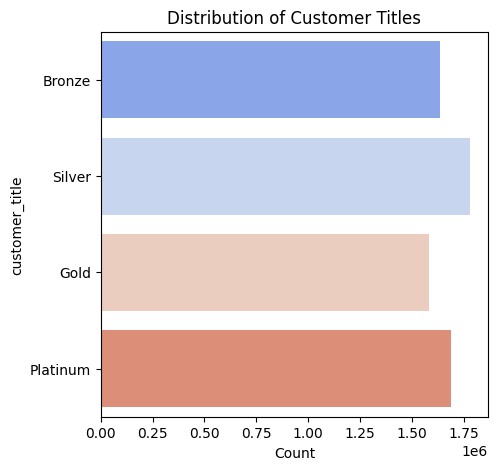

In [40]:
plt.figure(figsize=(5, 5))
sns.countplot(data=cust_rfm, y='customer_title', palette='coolwarm')
plt.title("Distribution of Customer Titles")
plt.xlabel("Count")

From the graph we can see that the customers are equally distributed withnin the ranks

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32184\333565150.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_rfm, y='detail_cust_title', palette='viridis')


Text(0.5, 0, 'Count')

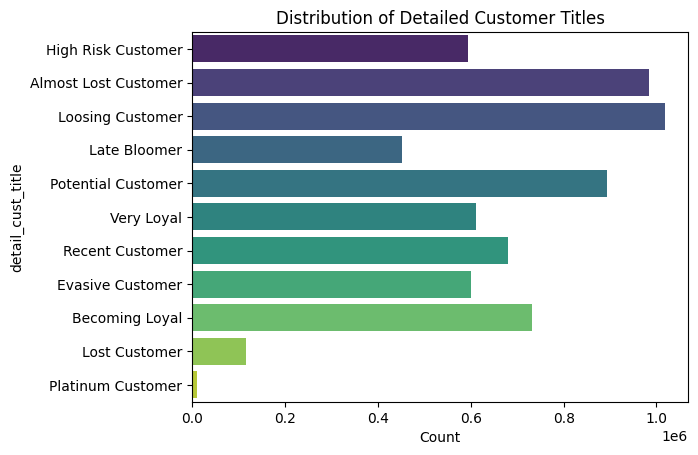

In [70]:
sns.countplot(data=cust_rfm, y='detail_cust_title', palette='viridis')
plt.title("Distribution of Detailed Customer Titles")
plt.xlabel("Count")

From the graph above the online retail store is facing a significant risk of losing customers

### RFM Analysis

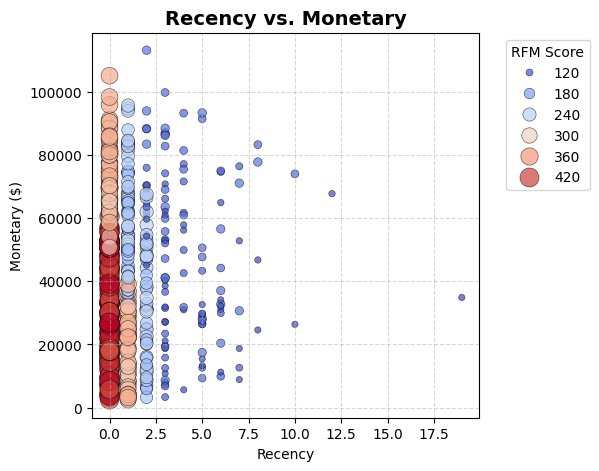

In [56]:
plt.figure(figsize=(5, 5))
sampled_data = cust_rfm.sample(n=500) 
sns.scatterplot(data=sampled_data, x='recency', y='monetary', 
                hue='rfm_score', size='rfm_score', 
                palette='coolwarm', sizes=(20, 200), alpha=0.7, edgecolor='black')

plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs. Monetary', fontsize=14, fontweight='bold')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

More recent Customers are more likely to spent more , also most important customers are found among  recent customers who also spent less

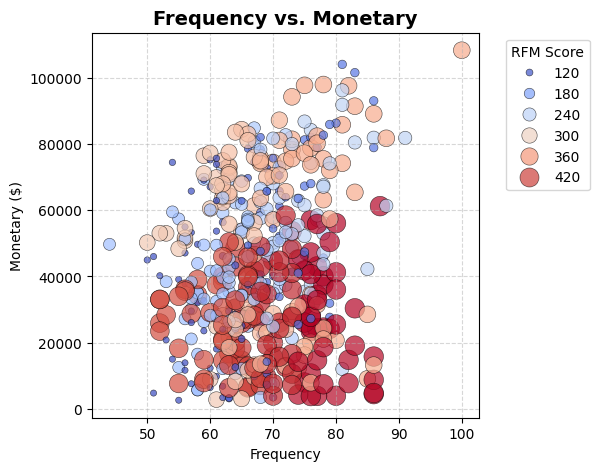

In [53]:
sampled_data = cust_rfm.sample(n=500)  # Randomly sample 10,000 data points

plt.figure(figsize=(5, 5))
sns.scatterplot(data=sampled_data, x='frequency', y='monetary', 
                hue='rfm_score', size='rfm_score', 
                palette='coolwarm', sizes=(20, 200), alpha=0.7, edgecolor='black')

plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs. Monetary', fontsize=14, fontweight='bold')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

More frequent customers spent more on products . More importance needed to be provided to frequent customers

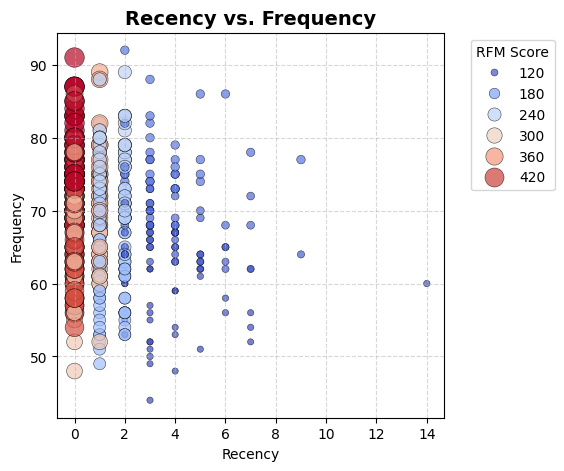

In [58]:
plt.figure(figsize=(5, 5))
sampled_data = cust_rfm.sample(n=500) 
sns.scatterplot(data=sampled_data , x='recency', y='frequency', 
                hue='rfm_score', size='rfm_score', 
                palette='coolwarm', sizes=(20, 200), alpha=0.7, edgecolor='black')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs. Frequency', fontsize=14, fontweight='bold')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

More recent customers are also more frequent.
Thus, from all charts, it can be concluded that the most important section is those who are more recent and frequent.

## The Cleaned Data is Exported which is Visualized in PowerBI

In [60]:
import os
folder_path='D:\Customer Segmentation'
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, 'products.csv')
cust_rfm.to_csv(file_path, index=False)